<a href="https://colab.research.google.com/github/ChristianAgyapong/Medgemma/blob/main/final_finetune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

christpong_eczema_tinea_corporis_path = kagglehub.dataset_download('christpong/eczema-tinea-corporis')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install unsloth bitsandbytes trl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.7/358.7 kB 7.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 32.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.1/423.1 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.8/506.8 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 103.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.4/284.4 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 MB 14.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.8/899.8 MB 2.0 MB/s eta 0:00:00:00:0100:01
  

In [ ]:
from kaggle_secrets import UserSecretsClient
from huggingface_hub import login
user_secrets = UserSecretsClient()
hf_token = user_secrets.get_secret("HF_TOKEN")
login(hf_token)

In [ ]:
from unsloth import FastVisionModel
import torch


model_id = "google/medgemma-4b-it"


model, tokenizer = FastVisionModel.from_pretrained(
    model_id,
    load_in_4bit=True,
    use_gradient_checkpointing=True,
    )

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


2025-11-27 04:10:49.962574: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764216650.333900      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764216650.445929      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.11.4: Fast Gemma3 patching. Transformers: 4.57.2.
   \\   /|    Tesla T4. Num GPUs = 2. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.0+cu128. CUDA: 7.5. CUDA Toolkit: 12.8. Triton: 3.5.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.33.post1. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: Using float16 precision for gemma3 won't work! Using float32.
Unsloth: Gemma3 does not support SDPA - switching to fast eager.


model.safetensors:   0%|          | 0.00/4.12G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

In [ ]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers=True,
    finetune_language_layers=True,
    finetune_attention_layers=True,
    finetune_mlp_modules=True,

    r=16,
    lora_alpha=16,
    lora_dropout=0,
    bias="none",
    random_state=3407,
    use_rslora=False,
    loftq_config=None,
    target_modules="all-linear"
)

Unsloth: Making `base_model.model.model.vision_tower.vision_model` require gradients


In [ ]:
from datasets import load_dataset

data_dir = "/kaggle/input/eczema-tinea-corporis"

dataset_dict = load_dataset("imagefolder", data_dir=data_dir, split="train")
dataset_dict

Resolving data files:   0%|          | 0/742 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['image', 'label'],
    num_rows: 741
})

In [ ]:
from datasets import DatasetDict

# First split
split1 = dataset_dict.train_test_split(
    train_size=0.8,
    test_size=0.2,
    seed=39,
)

# Split the 20% chunk into val & test
split2 = split1["test"].train_test_split(
    train_size=0.7,  # this becomes test
    test_size=0.3,   # this becomes validation
    seed=14,
)

data = DatasetDict({
    "train": split1["train"],
    "validation": split2["test"],  # 6%
    "test": split2["train"],       # 14%
    })
print(data)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 592
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 45
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 104
    })
})


In [ ]:
def add_caption(example):
    captions = {
        'Eczema (EC)': '''eczema.''',

        'Tinea Corporis (TC)': '''tinea corporis.'''
    }
    label_names = example['label_names']
    label_name = label_names[example['label']]

    example['caption'] = captions.get(label_name, 'This image shows a dermatological skin condition.')
    return example

In [ ]:
data['train'][0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 'label': 0}

In [ ]:
# Add captions to dataset
label_names = data['train'].features['label'].names
dataset = data.map(lambda ex: {**ex, 'label_names':label_names})
dataset = dataset.map(add_caption)

Map:   0%|          | 0/592 [00:00<?, ? examples/s]

Map:   0%|          | 0/45 [00:00<?, ? examples/s]

Map:   0%|          | 0/104 [00:00<?, ? examples/s]

In [ ]:
dataset['train'][0]['caption']

'eczema.'

In [ ]:
dataset['train'][1]['caption']

'tinea corporis.'

In [ ]:
#instruction = "You are an expert dermatolgist, analyze accurately and identify the type of skin condition in the image"


def convert_to_conversation(sample):
    conversation = [
        { "role": "user",
          "content" : [
            #{"type" : "text",  "text"  : instruction},
            {"type" : "image", "image" : sample["image"]} ]
        },
        { "role" : "assistant",
          "content" : [
            {"type" : "text",  "text"  : sample["caption"]} ]
        },
    ]
    return { "messages" : conversation }


In [ ]:
converted_train_dataset = [convert_to_conversation(sample) for sample in dataset['train'].shuffle(seed=22)]
converted_eval_dataset = [convert_to_conversation(sample) for sample in dataset['validation'].shuffle(seed=22)]

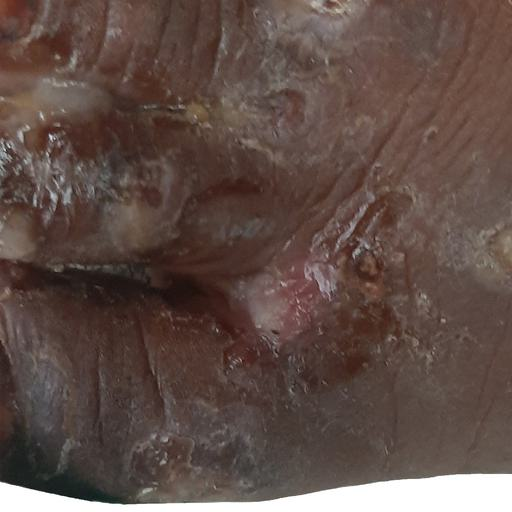

In [ ]:
dataset['train'][512]['image']

In [ ]:
FastVisionModel.for_inference(model) # Enable for inference!

image = dataset['train'][521]["image"]
instruction = "You are an expert dermatolgist, analyze accurately and identify the type of skin condition in the image"

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 160,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

Based on the image, the skin condition appears to be a **basal cell carcinoma (BCC)**. Here's why:

*   **Location:** BCCs are commonly found on sun-exposed areas of the skin, like the chest, face, and back.

*   **Appearance:** The lesion in the image has a pearly or waxy appearance, which is a characteristic feature of BCC. It also exhibits a raised, rolled border and may have a central indentation or ulceration.

*   **Risk factors:** If the person is of an older age and frequently sun exposure, there is a higher chance of BCC.

It is important to consult a dermatologist for a confirmed diagnosis and proper treatment plan.
<end_of_turn>


In [ ]:
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig


FastVisionModel.for_training(model)

args = SFTConfig(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 8,
        warmup_steps = 5,
        eval_strategy = 'steps',
        save_strategy = 'steps',
        eval_steps = 10,
        save_steps = 10,
        num_train_epochs = 10,
        learning_rate = 5e-5,
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.001,
        lr_scheduler_type = "cosine_with_restarts",
        seed = 3407,
        output_dir = "medgemma-4b-unsloth-finetuned",
        report_to = "none",

        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        max_length = 2048,
    )

import random
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer), # Must use!
        train_dataset = converted_train_dataset,
    eval_dataset = converted_eval_dataset,
    args=args
)

Unsloth: Switching to float32 training since model cannot work with float16


In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 592 | Num Epochs = 10 | Total steps = 370
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 8
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 8 x 1) = 16
 "-____-"     Trainable parameters = 38,497,792 of 4,338,577,264 (0.89% trained)


Step,Training Loss,Validation Loss
10,7.189800,6.832106
20,3.632900,3.454657
30,1.307100,1.231027
40,0.824300,0.794415
50,0.362000,0.251202
60,0.125100,0.122903
70,0.032800,0.063552
80,0.036500,0.032425
90,0.036900,0.031115
100,0.043000,0.032829


Unsloth: Not an error, but Gemma3ForConditionalGeneration does not accept `num_items_in_batch`.
Using gradient accumulation will be very slightly less accurate.
Read more on gradient accumulation issues here: https://unsloth.ai/blog/gradient


In [ ]:
model.save_pretrained("lora_model")  # Local saving
tokenizer.save_pretrained("lora_model")

['lora_model/processor_config.json']

In [ ]:
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score


"""model_name = " " # finetune so args.output_dir

model, tokenizer = FastVisionModel.from_pretrained(
    model_name,
    laod_in_4bit = True,)"""


model.eval() # evaluation mode

# Get label names - handle single-class datasets
if 'label' in dataset['train'].features:
    label_names = dataset['train'].features["label"].names
else:
    # Single-class dataset (all eczema)
    label_names = ['eczema']
print(f"Label names: {label_names}")



# Batch inference function for single-class datasets
def batch_inference(model, tokenizer, dataset, batch_size=2):
    all_preds = []

    for i in tqdm(range(0, len(dataset), batch_size)):
        batch = dataset[i:i+batch_size]
        if isinstance(batch, dict):
            for k in batch:
                batch[k] = [batch[k]]

        images = batch["image"]

        # Create conversations for each image
        conversations = [
            [
                {"role": "user", "content": [
                    {"type": "image", 'image': img},
                ]}
            ]
            for img in images
        ]

        # Apply chat template
        input_texts = [
            tokenizer.apply_chat_template(conv, add_generation_prompt=True)
            for conv in conversations
        ]

        # Tokenize both text and images
        inputs = tokenizer(
            images,
            input_texts,
            add_special_tokens=False,
            return_tensors="pt",
            padding=True
        ).to("cuda")

        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=50,  # Increased to allow full response
                use_cache=True,
                do_sample=False,  # Greedy decoding for deterministic results
            )

        # Decode only the NEW tokens (exclude input)
        input_length = inputs['input_ids'].shape[1]
        generated_ids = outputs[:, input_length:]  # Only new tokens
        preds = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
        all_preds.extend(preds)

    return all_preds

predictions = batch_inference(model, tokenizer, dataset['test'], batch_size=1)

# Count how many predictions contain 'eczema' (case-insensitive)
correct = sum(1 for pred in predictions if 'eczema' in pred.lower())
total = len(predictions)

# Calculate accuracy
accuracy = correct / total
print(f"\nResults:")
print(f"Total test images: {total}")
print(f"Correct predictions: {correct}")
print(f"Accuracy: {accuracy * 100:.2f}%")

Label names: ['Eczema (EC)', 'Tinea Corporis (TC)']


100%|██████████| 104/104 [02:44<00:00,  1.58s/it]


Results:
Total test images: 104
Correct predictions: 67
Accuracy: 64.42%


In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import evaluate
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Load evaluation metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

print("Evaluation metrics loaded successfully!")
print(f"Dataset has {len(label_names)} classes: {label_names}")
print(f"Number of test samples: {len(dataset['test'])}")

Evaluation metrics loaded successfully!
Dataset has 2 classes: ['Eczema (EC)', 'Tinea Corporis (TC)']
Number of test samples: 104


In [ ]:
# Calculate comprehensive metrics for single-class classification

# Since this is a single-class dataset (all eczema), we create binary labels:
# 1 = model correctly identified eczema
# 0 = model failed to identify eczema

# Ground truth: all samples are eczema (class 1)
true_labels = [1] * len(predictions)

# Predictions: 1 if 'eczema' found in response, 0 otherwise
pred_labels = [1 if 'eczema' in pred.lower() else 0 for pred in predictions]

# Calculate metrics using evaluate library
metrics = {}

metrics['accuracy'] = accuracy_metric.compute(
    predictions=pred_labels,
    references=true_labels
)['accuracy']

metrics['f1'] = f1_metric.compute(
    predictions=pred_labels,
    references=true_labels,
    average='binary'
)['f1']

metrics['precision'] = precision_metric.compute(
    predictions=pred_labels,
    references=true_labels,
    average='binary'
)['precision']

metrics['recall'] = recall_metric.compute(
    predictions=pred_labels,
    references=true_labels,
    average='binary'
)['recall']

# Calculate additional metrics
cm = confusion_matrix(true_labels, pred_labels)
# Since all true labels are 1 (eczema), we only have TP and FN
# Extract values safely
tp = sum((t == 1 and p == 1) for t, p in zip(true_labels, pred_labels))
fn = sum((t == 1 and p == 0) for t, p in zip(true_labels, pred_labels))
tn = 0  # No true negatives possible (no negative samples)
fp = 0  # No false positives possible (no negative samples)

# Display comprehensive results
print("\n" + "="*60)
print("MODEL EVALUATION RESULTS - ECZEMA DETECTION")
print("="*60)
print(f"\nOverall Metrics:")
print(f"  Accuracy:  {metrics['accuracy']*100:.2f}%")
print(f"  F1 Score:  {metrics['f1']*100:.2f}%")
print(f"  Precision: {metrics['precision']*100:.2f}%")
print(f"  Recall:    {metrics['recall']*100:.2f}%")

print(f"\nDetailed Breakdown:")
print(f"  Total test images: {len(predictions)}")
print(f"  Correctly identified as eczema (TP): {tp}")
print(f"  Failed to identify as eczema (FN): {fn}")
print(f"  Success rate: {tp}/{len(predictions)} ({tp/len(predictions)*100:.2f}%)")

print(f"\nConfusion Matrix:")
print(f"  True Positives (Correct):  {tp}")
print(f"  False Negatives (Missed):  {fn}")
print(f"  Note: TN and FP are 0 (single-class dataset with all eczema samples)")

# Analyze prediction patterns
print(f"\nPrediction Analysis:")
correct_preds = sum(1 for pred in predictions if 'eczema' in pred.lower())
refused = sum(1 for pred in predictions if any(word in pred.lower() for word in ['cannot', 'unable', 'not able', 'can\'t']))
wrong_diagnosis = sum(1 for pred in predictions if any(word in pred.lower() for word in ['psoriasis', 'dermatitis', 'rash', 'acne']) and 'eczema' not in pred.lower())

print(f"  Correct 'eczema' predictions: {correct_preds}")
print(f"  Refusals/Safety responses:    {refused}")
print(f"  Wrong diagnoses:              {wrong_diagnosis}")
print(f"  Other responses:              {len(predictions) - correct_preds - refused - wrong_diagnosis}")
print("="*60)


MODEL EVALUATION RESULTS - ECZEMA DETECTION

Overall Metrics:
  Accuracy:  64.42%
  F1 Score:  78.36%
  Precision: 100.00%
  Recall:    64.42%

Detailed Breakdown:
  Total test images: 104
  Correctly identified as eczema (TP): 67
  Failed to identify as eczema (FN): 37
  Success rate: 67/104 (64.42%)

Confusion Matrix:
  True Positives (Correct):  67
  False Negatives (Missed):  37
  Note: TN and FP are 0 (single-class dataset with all eczema samples)

Prediction Analysis:
  Correct 'eczema' predictions: 67
  Refusals/Safety responses:    0
  Wrong diagnoses:              0
  Other responses:              37
